<a href="https://colab.research.google.com/github/shuvad23/Airbnb-Data-Analysis-Project/blob/main/Airbnb_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airbnb Data Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
airbnb_filepath='/content/airbnb_data_file.csv'
df=pd.read_csv(airbnb_filepath)
df.head()

<ipython-input-4-e68292a0f72b>:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(airbnb_filepath)


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [ ]:
df.shape

(102599, 26)

In [ ]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [5]:
df.rename(columns={'NAME':'name'},inplace=True)

In [6]:
df.columns

Index(['id', 'name', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

Checking missing values

In [7]:
df.isnull().sum()

,0
id,0
name,237
host id,0
host_identity_verified,289
host name,391
neighbourhood group,30
neighbourhood,17
lat,9
long,9
country,406


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   name                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

### Pre-processing ('last review' and 'reviews per month')

1. last review

In [8]:
df.rename(columns={'last review':'last_review','reviews per month':'reviews_per_month'},inplace=True)

In [ ]:
df['last review'].dtype

dtype('O')

In [9]:
df['last_review']=pd.to_datetime(df['last_review'],errors='coerce')

In [ ]:
print(df['last_review'].dtype)

datetime64[ns]


In [ ]:
df['last_review'].head()

,last_review
0,2021-10-19
1,2022-05-21
2,NaT
3,2019-07-05
4,2018-11-19


In [10]:
df.fillna({'last_review':df.last_review.min()},inplace=True)

In [ ]:
df.last_review.head()

,last_review
0,2021-10-19
1,2022-05-21
2,2012-07-11
3,2019-07-05
4,2018-11-19


In [ ]:
df['last_review'].isnull().sum()

np.int64(0)

2. reviews per month

In [ ]:
df['reviews_per_month'].head()

,reviews_per_month
0,0.21
1,0.38
2,0.00
3,4.64
4,0.10


In [ ]:
df.reviews_per_month.dtype

dtype('float64')

In [ ]:
df.reviews_per_month.isnull().sum()

np.int64(15879)

In [11]:
df.fillna({'reviews_per_month':0},inplace=True)

In [ ]:
df.reviews_per_month.isnull().sum()

np.int64(0)

In [ ]:
df.reviews_per_month.head()

,reviews_per_month
0,0.21
1,0.38
2,0.00
3,4.64
4,0.10


### Drop the null values of 'name' and 'host name' column

In [12]:
df.dropna(subset=['name','host name'],inplace=True)

In [ ]:
df.isnull().sum()

,0
id,0
name,0
host id,0
host_identity_verified,276
host name,0
neighbourhood group,26
neighbourhood,16
lat,8
long,8
country,526


### Drop the last two columns

In [13]:
df.drop(['house_rules','license'],errors='ignore',axis=1,inplace=True)

In [ ]:
df.columns.nunique()

24

### Pre-processing ('price' and 'service fees') columns

In [14]:
df.price=df.price.str.replace('[\$,]','', regex=True).astype(float)
df['service fee']=df['service fee'].str.replace('[\$,]','',regex=True).astype(float)

In [ ]:
df.head()

,id,name,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last_review,reviews_per_month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,620.0,124.0,3.0,0.0,2012-07-11,0.00,5.0,1.0,352.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0


In [15]:
df.fillna({'price':0,'service fee':0},inplace=True)

### Remove duplicates

In [16]:
df.drop_duplicates(inplace=True)

Descriptive statistics

In [ ]:
df.describe()

,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,last_review,reviews_per_month,review rate number,calculated host listings count,availability 365
count,1.014100e+05,1.014100e+05,101402.000000,101402.000000,101210.000000,101410.000000,101410.000000,101016.000000,101228.000000,101410,101410.000000,101103.000000,101092.000000,100990.000000
mean,2.920959e+07,4.926155e+10,40.728082,-73.949663,2012.486908,623.907129,124.713539,8.113744,27.511854,2018-05-15 21:26:08.721033728,1.163207,3.278558,7.948463,141.164660
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,0.000000,0.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.000000,1.000000,1.000000,-10.000000
25%,1.507574e+07,2.459183e+10,40.688730,-73.982570,2007.000000,338.000000,67.000000,2.000000,1.000000,2017-07-30 00:00:00,0.090000,2.000000,1.000000,3.000000
50%,2.922911e+07,4.912069e+10,40.722300,-73.954440,2012.000000,623.000000,125.000000,3.000000,7.000000,2019-05-23 00:00:00,0.480000,3.000000,1.000000,96.000000
75%,4.328308e+07,7.399747e+10,40.762750,-73.932340,2017.000000,912.000000,182.000000,5.000000,31.000000,2019-07-01 00:00:00,1.710000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.626820e+07,2.853703e+10,0.055850,0.049474,5.765130,332.603385,66.536119,30.378014,49.549258,NaN,1.683708,1.285369,32.328974,135.419199


# visulization

### Question 01: What is the Distribution of listing prices ?

Text(0, 0.5, 'Frequency')

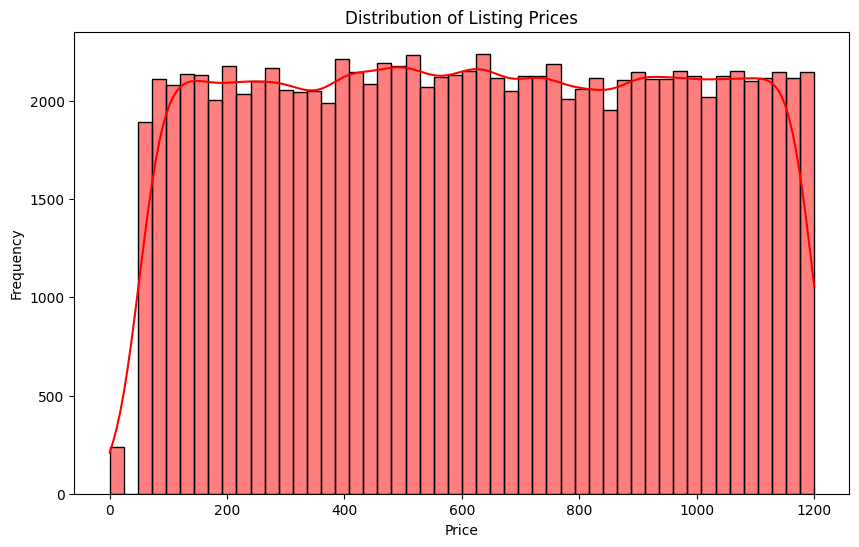

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'],bins=50,color='red',kde=True)
plt.title('Distribution of Listing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

**Conclusion:**

The histogram shows a fairly even distribution of
listing prices across different price ranges, indicating no
particular concentration of listings in any specific price range.
The KDE line helps visualize this even spread more clearly,
confirming that the dataset contains listings with a wide variety of prices.

### Question 02:  How are different room types distributed ?

In [ ]:
df['room type']

,room type
0,Private room
1,Entire home/apt
2,Private room
4,Entire home/apt
5,Entire home/apt
...,...
102053,Private room
102054,Private room
102055,Entire home/apt
102056,Private room


In [ ]:
df['room type'].nunique()

4

<ipython-input-85-3ef003273e33>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='room type',data=df,palette='viridis')


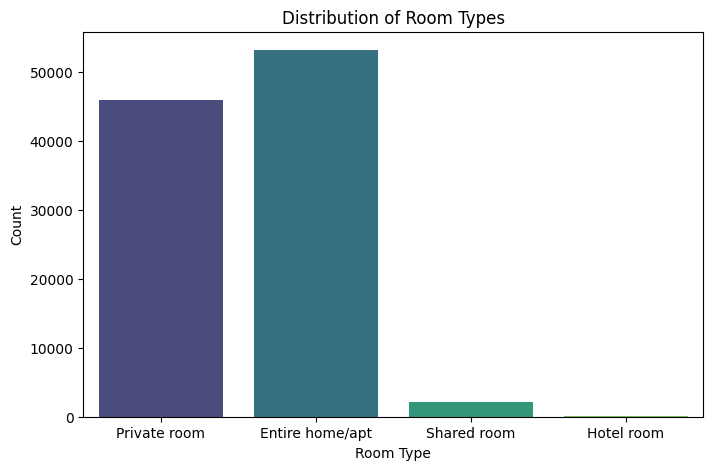

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='room type',data=df,palette='viridis')
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

**Conclusion: **

The count plot shows a clear distribution of the different
room types available in the Airbnb dataset.
The majority of listings are for
'Entire home/apt' and 'Private room', with 'Shared room' and 'Hotel room'
being much less common. This insight can be useful
for understanding the availability and popularity of
different types of accommodations on Airbnb.


### Question 03: How are listings distributed across different neighborhoods ?

In [ ]:
df['neighbourhood group']

,neighbourhood group
0,Brooklyn
1,Manhattan
2,Manhattan
4,Manhattan
5,Manhattan
...,...
102053,Brooklyn
102054,Brooklyn
102055,Brooklyn
102056,Manhattan


<ipython-input-90-6f8fff4847b9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='neighbourhood group',data=df,palette='viridis',


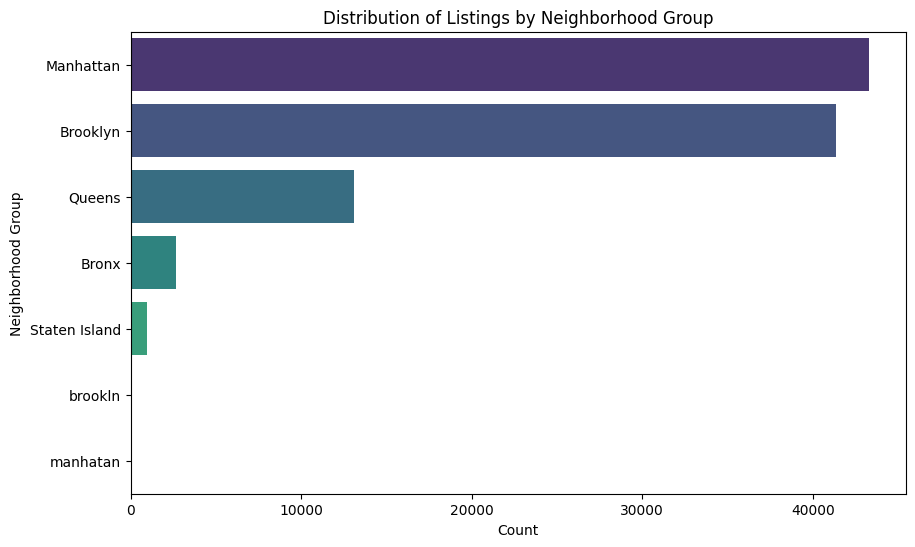

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y='neighbourhood group',data=df,palette='viridis',
              order=df['neighbourhood group'].value_counts().index)
plt.title('Distribution of Listings by Neighborhood Group')
plt.xlabel('Count')
plt.ylabel('Neighborhood Group')
plt.show()

**Conclusion:**

The count plot shows a clear distribution
of the number of listings across different neighborhood
groups. Manhattan and Brooklyn dominate the listings,
suggesting they are prime locations for Airbnb. Queens,
Bronx, and Staten Island have fewer listings,
indicating less availability or popularity.


### Question 04: What is the relationship between price and room type ?

<ipython-input-91-8686227a8f2d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='room type',y='price',data=df,palette='viridis')


Text(0, 0.5, 'Price')

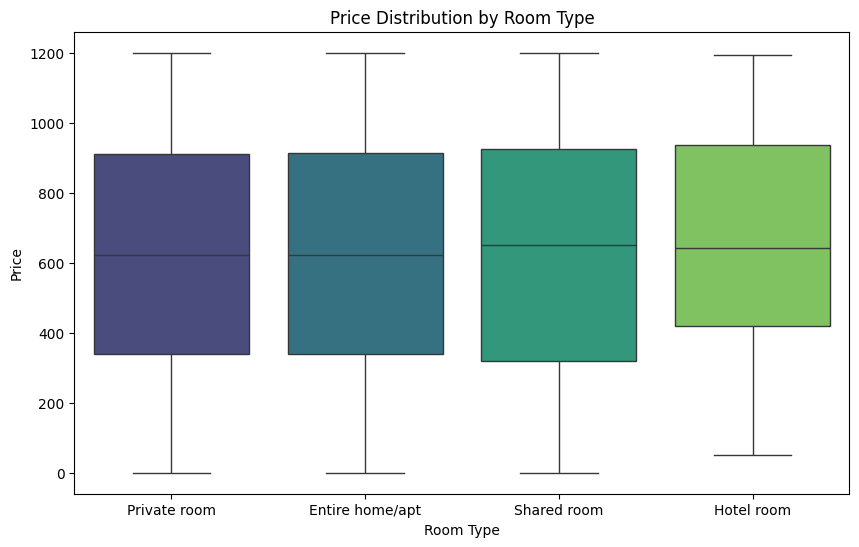

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='room type',y='price',data=df,palette='viridis')
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

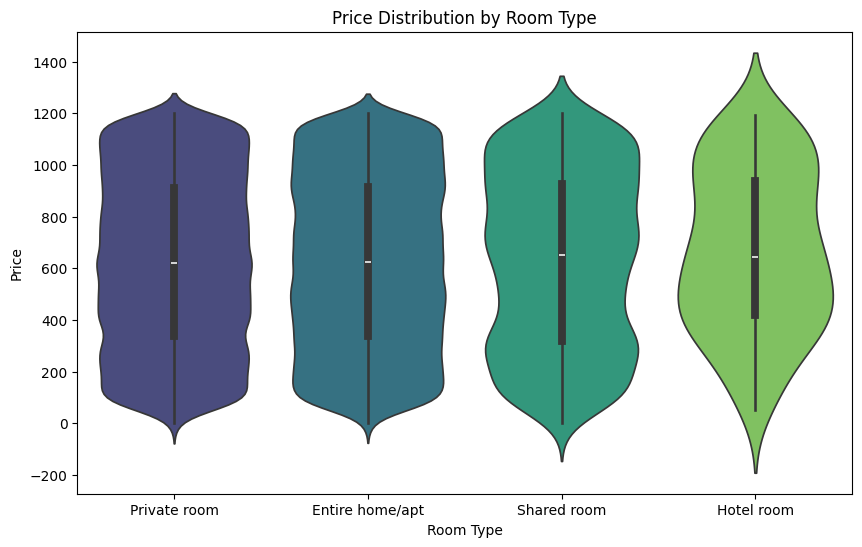

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(x='room type',y='price',hue='room type',data=df,palette='viridis')
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')

**Conclusion:**

Price vs. Room Type
The box plot provides a detailed view
of how prices vary across different room types
in the Airbnb dataset. It shows that while
'Shared room' tends to have lower prices, 'Private room',
'Entire home/apt', and 'Hotel room' have higher and more varied price ranges.
This visualization helps in understanding the pricing
dynamics for different types of accommodations on Airbnb.


### Question 05: How has the number of reviews change over with time ?

In [ ]:
reviews_over_time=df.groupby(df.last_review.dt.to_period('M')).size()
reviews_over_time

,0
last_review,
2012-07,15719
2012-08,4
2012-09,10
2012-11,4
2012-12,6
...,...
2022-05,4
2024-08,1
2025-06,1


Text(0, 0.5, 'Number of Reviews')

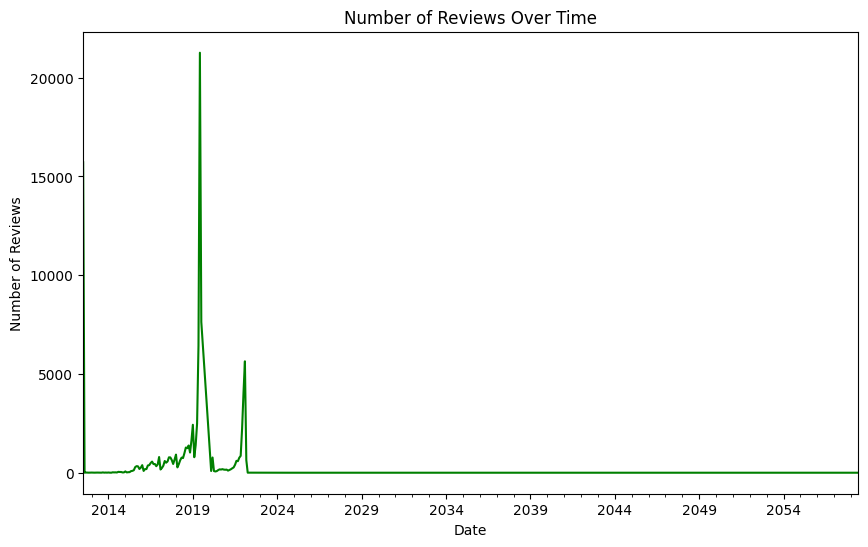

In [ ]:
plt.figure(figsize=(10,6))
reviews_over_time.plot(kind='line',color='green')
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')

**Conclusion:**

The line plot provides a clear visualization
of the number of reviews over time.
It helps identify trends and patterns in review activity,
such as periods of high or low activity.
This information can be useful for understanding
 the dynamics of user engagement and the popularity
of Airbnb listings over time. The significant spikes
and drops in reviews might be worth further investigation
 to understand the underlying causes, such as changes
 in Airbnb policies, market conditions, or external events.


### Question 06: 💡 "What factors influence the price of a listing the most?"

In [23]:
# Select relevant columns for analysis
relevant_cols = [
    'price', 'room type', 'neighbourhood group', 'minimum nights',
    'number of reviews', 'reviews_per_month', 'review rate number',
    'calculated host listings count', 'availability 365'
]
# Filter dataset to keep only the relevant columns
df_clean=df[relevant_cols].dropna() # df[relevant_cols] selects only the columns specified in relevant_cols.

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df_clean, columns=['room type','neighbourhood group'],drop_first=True)# pd.get_dummies() converts categorical columns (room type, neighbourhood group) into numerical format.
# note: Encoding Categorical Data: Machine learning models require numerical inputs, so get_dummies() converts text categories into numbers.

df_encoded.head()

,price,minimum nights,number of reviews,reviews_per_month,review rate number,calculated host listings count,availability 365,room type_Hotel room,room type_Private room,room type_Shared room,neighbourhood group_Brooklyn,neighbourhood group_Manhattan,neighbourhood group_Queens,neighbourhood group_Staten Island,neighbourhood group_brookln,neighbourhood group_manhatan
0,966.0,10.0,9.0,0.21,4.0,6.0,286.0,False,True,False,True,False,False,False,False,False
1,142.0,30.0,45.0,0.38,4.0,2.0,228.0,False,False,False,False,True,False,False,False,False
2,620.0,3.0,0.0,0.00,5.0,1.0,352.0,False,True,False,False,True,False,False,False,False
4,204.0,10.0,9.0,0.10,3.0,1.0,289.0,False,False,False,False,True,False,False,False,False
5,577.0,3.0,74.0,0.59,3.0,1.0,374.0,False,False,False,False,True,False,False,False,False


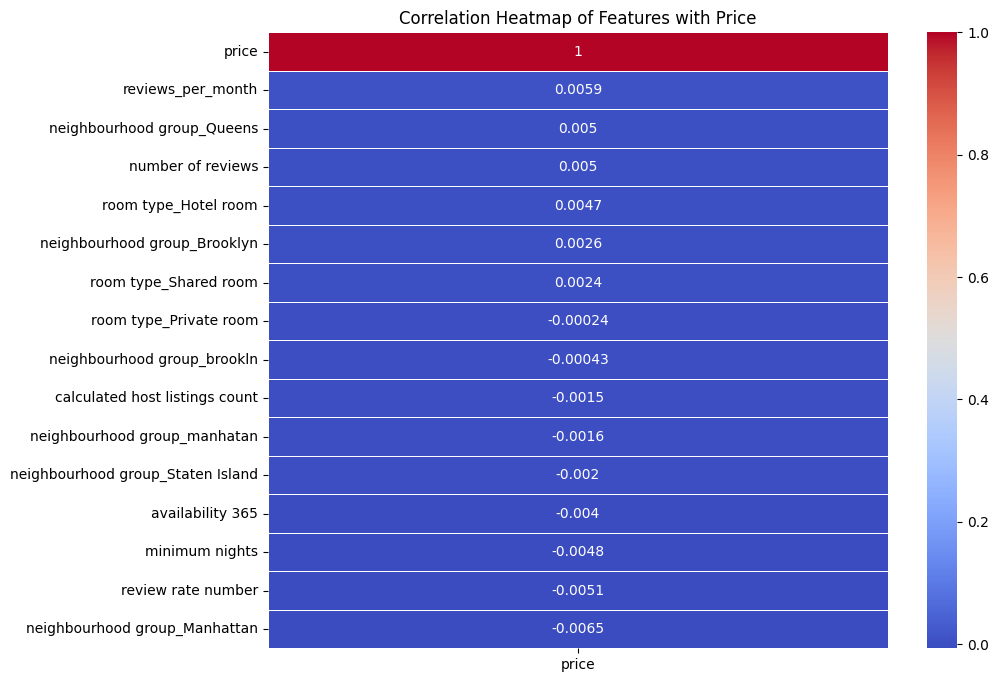

In [25]:
"""
What is a Heatmap?
A heatmap is just a colored grid that shows the strength of relationships between variables — in our case, how each feature (like room type or number of reviews) is related to price.

It uses correlation values, which range from:

  a/ +1 → Strong positive relationship (when X increases, Y increases)

  b/ 0 → No relationship

  c/ –1 → Strong negative relationship (when X increases, Y decreases)

"""

# Calculate correlation matrix
corr_matrix = df_encoded.corr()

# Plot heatmap of correlations with price
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix[['price']].sort_values(by='price',ascending=False),annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Heatmap of Features with Price')
plt.show()

**Conclusion: **
1. Room type is one of the biggest drivers of price.

2. Listings in premium locations (like Queens) generally cost more.

3. Shared rooms are clearly the lowest in price.

### **Question 07:**🏡 "How does room type affect price and availability?"

This question has two parts:

1. Do different room types have different price levels?

2. Do different room types have different availability (how often they're bookable)?

<ipython-input-27-f214cd3f663f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='room type', y='price', data=df,palette='viridis')


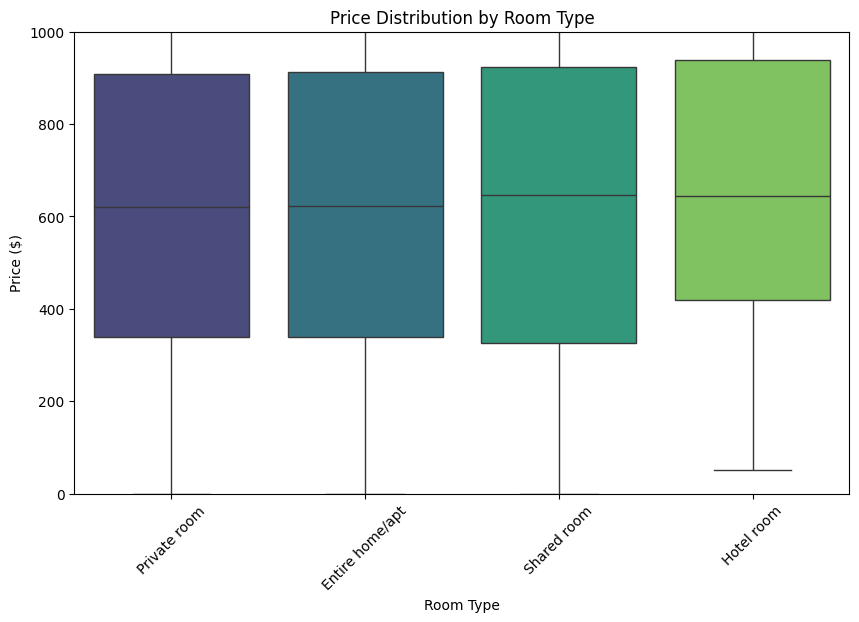

In [27]:
# 1.
# 📊 1. Boxplot: Room Type vs Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='room type', y='price', data=df,palette='viridis')
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.ylim(0, 1000)  # To reduce effect of outliers
plt.show()

<ipython-input-28-ee461e3a21bc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='room type', y='availability 365', data=df,palette='viridis')


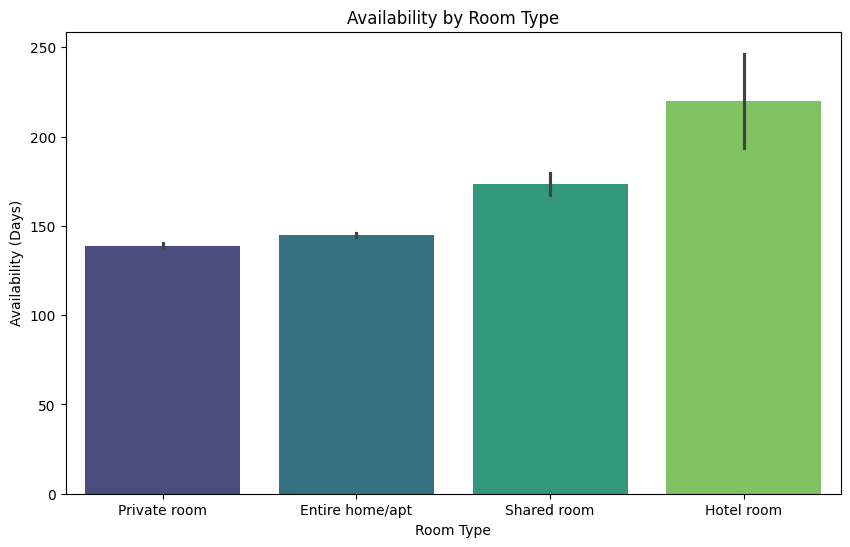

In [28]:
# 2.
# 📉 2. Barplot: Room Type vs Availability
plt.figure(figsize=(10, 6))
sns.barplot(x='room type', y='availability 365', data=df,palette='viridis')
plt.title('Availability by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Availability (Days)')
plt.show()

**Conclusion:**

1. Boxplot will show which room types tend to cost more (median line) and how spread out the prices are.

2. Barplot will show how many days per year, on average, listings of each room type are available.

###📍 Question 08: Which neighborhoods have the highest average prices?

This is about comparing average prices per neighborhood, which helps answer:

1. Where are the most expensive and cheapest places to stay?

2. Do certain areas (like Manhattan, Brooklyn, etc.) dominate the pricing?

In [33]:
df.groupby('neighbourhood group')['price'].describe().sort_values(by='mean',ascending=False)

,count,mean,std,min,25%,50%,75%,max
neighbourhood group,,,,,,,,
Queens,12377.0,628.377394,334.496126,0.0,339.0,626.0,919.0,1200.0
Bronx,2527.0,625.860704,325.147586,0.0,355.5,630.0,905.5,1200.0
Brooklyn,39043.0,624.754578,332.748215,0.0,338.0,624.0,912.0,1200.0
Manhattan,41167.0,620.935992,332.197313,0.0,336.0,620.0,910.0,1200.0
Staten Island,886.0,618.111738,327.765311,0.0,340.0,622.5,905.0,1200.0
brookln,1.0,580.000000,NaN,580.0,580.0,580.0,580.0,580.0
manhatan,1.0,460.000000,NaN,460.0,460.0,460.0,460.0,460.0


<ipython-input-29-f6662c48ff14>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_prices_by_neighbourhood_group.index,y=avg_prices_by_neighbourhood_group.values,palette='viridis')


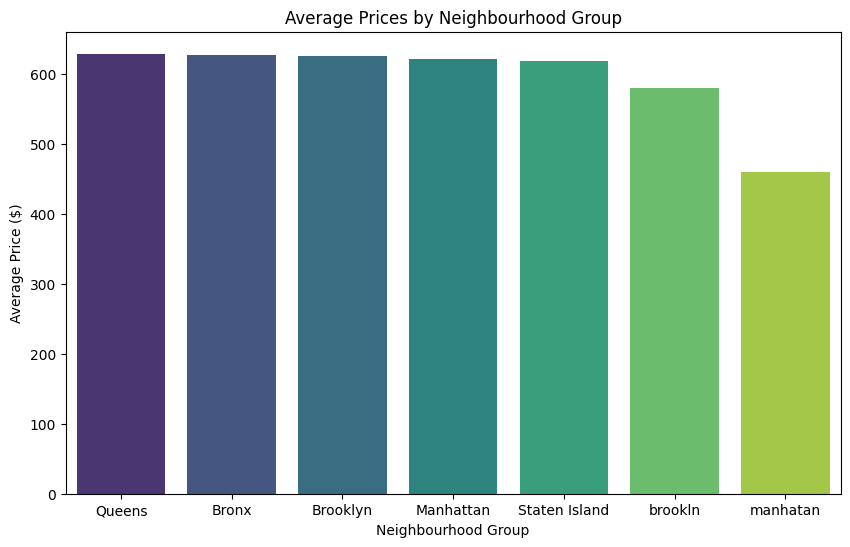

In [29]:
# Group by neighbourhood group and calculate average price
avg_prices_by_neighbourhood_group=df.groupby('neighbourhood group')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_prices_by_neighbourhood_group.index,y=avg_prices_by_neighbourhood_group.values,palette='viridis')
plt.title('Average Prices by Neighbourhood Group')
plt.ylabel('Average Price ($)')
plt.xlabel('Neighbourhood Group')
plt.show()

In [39]:
top_neighbourhoods=df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)

<ipython-input-40-c627ff09bbf1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_neighbourhoods.index,y=top_neighbourhoods.values,palette='magma')


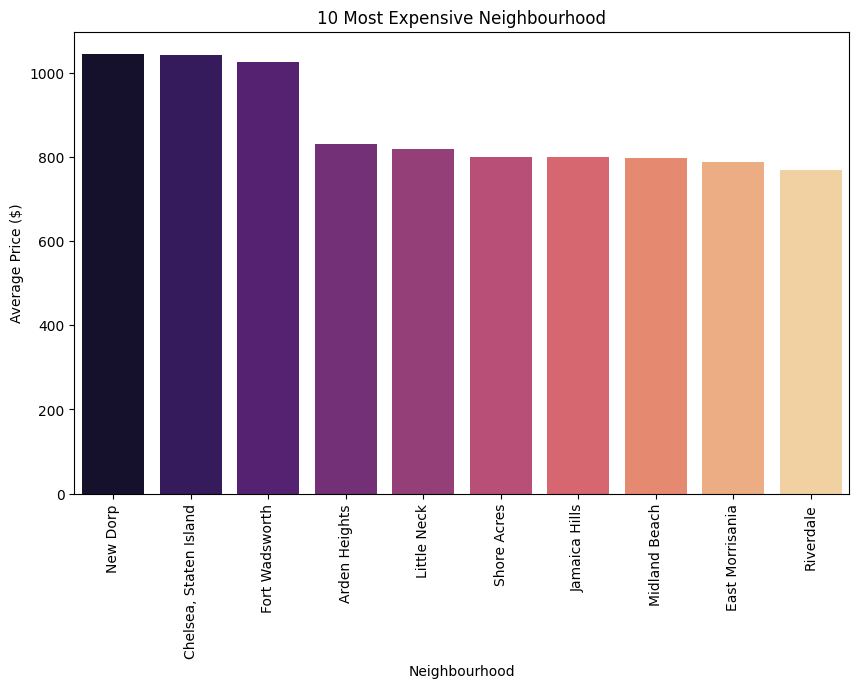

In [40]:
# 10 Most Expensive Neighbourhood
plt.figure(figsize=(10,6))
sns.barplot(x=top_neighbourhoods.index,y=top_neighbourhoods.values,palette='magma')
plt.title('10 Most Expensive Neighbourhood')
plt.ylabel('Average Price ($)')
plt.xlabel('Neighbourhood')
plt.xticks(rotation=90)
plt.show()

### 📆 Question 09: Is there a pattern between number of reviews and availability?
This explores whether:

1. Listings with more reviews are more available (booked often)?

2. Or maybe, do less available listings get fewer reviews?

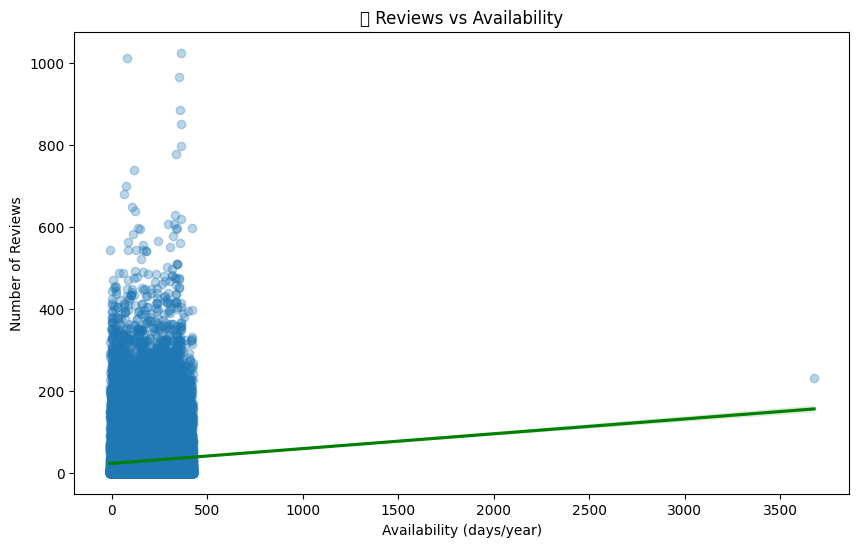

In [42]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='availability 365', y='number of reviews', data=df, scatter_kws={'alpha': 0.3}, line_kws={'color': 'green'})
plt.title('📈 Reviews vs Availability')
plt.xlabel('Availability (days/year)')
plt.ylabel('Number of Reviews')
plt.show()

**Conclusion: **

the green line slopes upward, it means more available listings tend to get more reviews.

###❓Question 10: Are there any outliers in price, and how should they be handled?

This is super important in real-world data — outliers can:

1. Skew your averages

2. Confuse models

3. Mess up visualizations

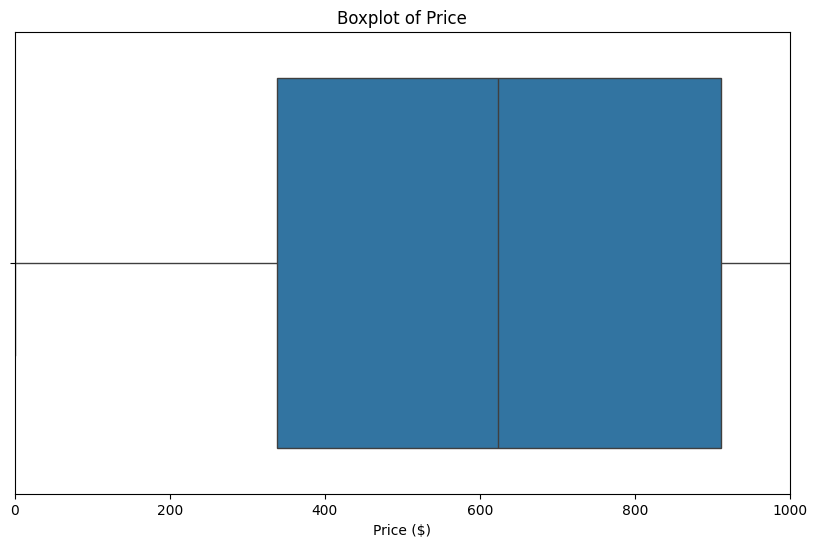

In [43]:
# 1. Visual Detection
plt.figure(figsize=(10,6))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price')
plt.xlabel('Price ($)')
plt.xlim(0,1000) # Limit to 1000 for better view (optional)
plt.show()

In [53]:
# 📐 Detect Outliers with IQR:
q1=df['price'].quantile(0.25)
q3=df['price'].quantile(0.75)
IQR=q3-q1 # InterQuartile Range is always Q3 minus Q1

# Define outlier range
lower_bound=q1 - 1.5*IQR
upper_bound=q3 + 1.5*IQR

# Print how many outliers
outliers=df[(df['price']<lower_bound) | (df['price']>upper_bound)]
print(f'Found {len(outliers)} price outliers out of {len(df)} listings.')

Found 0 price outliers out of 96028 listings.


In [50]:
print(lower_bound)
print(upper_bound)

-521.875
1771.125


In [52]:
df.price.min()
df.price.max()

1200.0